In [1]:
import pandas as pd
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos los datos 
años = ["2018", "2019", "2020", "2021", "2022", "2023", "2024"]
dataframes = {}
for a in años:
    dataframes[a] = pd.read_csv(filepath_or_buffer=f'./{a}.csv', 
                    delimiter=';', 
                    decimal=',',
                    header=0)

In [2]:
#Seleccionamos los datos de Dióxido de Nitrógeno (8), Partículas en Ssupensión < PM10 (10) y Ozono (14)
magnitudes = [8, 10, 14]
for a in dataframes:
    df = dataframes[a]
    dataframes[a] = df[df.magnitud.isin(magnitudes)]
   
dataframes["2022"]


,provincia,municipio,estacion,magnitud,punto_muestreo,ano,mes,dia,h01,v01,...,h20,v20,h21,v21,h22,v22,h23,v23,h24,v24
3,28,102,1,8,28102001_8_8,2022,1,1,8.0,V,...,16.0,V,15.0,V,12.0,V,10.0,V,9.0,V
4,28,102,1,10,28102001_10_49,2022,1,1,5.0,V,...,9.0,V,7.0,V,6.0,V,5.0,V,6.0,V
6,28,102,1,14,28102001_14_6,2022,1,1,59.0,V,...,49.0,V,50.0,V,52.0,V,54.0,V,56.0,V
8,28,120,1,8,28120001_8_8,2022,1,1,1.0,V,...,1.0,V,1.0,V,1.0,V,1.0,V,1.0,V
10,28,120,1,10,28120001_10_49,2022,1,1,1.0,V,...,1.0,V,2.0,V,2.0,V,1.0,V,1.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58282,28,9,1,8,28009001_8_8,2022,12,31,12.0,V,...,39.0,V,22.0,V,18.0,V,19.0,V,13.0,V
58285,28,9,1,14,28009001_14_6,2022,12,31,50.0,V,...,34.0,V,36.0,V,48.0,V,39.0,V,47.0,V
58289,28,92,5,8,28092005_8_8,2022,12,31,19.0,V,...,89.0,V,83.0,V,78.0,V,73.0,V,71.0,V
58290,28,92,5,10,28092005_10_49,2022,12,31,23.0,V,...,46.0,V,50.0,V,47.0,V,44.0,V,54.0,V


In [3]:
#Seleccionamos las estaciones de Leganés (74,7), Torrejón de Ardoz (148,4) y Guadalix de la Sierrra (67,1)
est = [(74,7), (148,4), (67,1)]

for a in dataframes:
    df = dataframes[a]
    dataframes[a] = df[df.apply(lambda row: (row['municipio'], row['estacion']) in est, axis=1)]
    

In [4]:
# Quitamos las columnas que aportan información redundante
for a in dataframes:
    df = dataframes[a]
    dataframes[a] = df.drop(['provincia', 'punto_muestreo'], axis = 1)


In [5]:
# Creamos un diccionario con los datos de las magnitudes para cada estación
#Leganés (74,7)
leg_N = {}
leg_O = {}
leg_P = {}
for a in años:
    df = dataframes[a]
    leg_N[a]= df[(df['municipio'] == 74) & 
                         (df['estacion'] == 7) & 
                         (df['magnitud'] == 8)]
    leg_O[a]= df[(df['municipio'] == 74) & 
                         (df['estacion'] == 7) & 
                         (df['magnitud'] == 14)]
    leg_P[a]= df[(df['municipio'] == 74) & 
                         (df['estacion'] == 7) & 
                         (df['magnitud'] == 10)]
#Torrejón de Ardoz (148, 4)
torr_N = {}
torr_O = {}
torr_P = {}
for a in años:
    df = dataframes[a]
    torr_N[a]= df[(df['municipio'] == 148) & 
                         (df['estacion'] == 4) & 
                         (df['magnitud'] == 8)]
    torr_O[a]= df[(df['municipio'] == 148) & 
                         (df['estacion'] == 4) & 
                         (df['magnitud'] == 14)]
    torr_P[a]= df[(df['municipio'] == 148) & 
                         (df['estacion'] == 4) & 
                         (df['magnitud'] == 10)]

#Guadalix de la Sierra (67, 1)
guad_N = {}
guad_O = {}
guad_P = {}
for a in años:
    df = dataframes[a]
    guad_N[a]= df[(df['municipio'] == 67) & 
                         (df['estacion'] == 1) & 
                         (df['magnitud'] == 8)]
    guad_O[a]= df[(df['municipio'] == 67) & 
                         (df['estacion'] == 1) & 
                         (df['magnitud'] == 14)]
    guad_P[a]= df[(df['municipio'] == 67) & 
                         (df['estacion'] == 1) & 
                         (df['magnitud'] == 10)]


#Creamos una lista con todos los datframes para limpiarlos 
df_loc_mag = [leg_N, leg_O, leg_P, torr_N, torr_O, torr_P, guad_N, guad_O, guad_P]



In [6]:
#Sustituimos los valores no válidos(N) y los valores Nan por la media de los valores a dicha hora a lo largo del año 

str_val = [f'v{str(i).zfill(2)}' for i in range(1, 25)]
str_horas = [f'h{str(i).zfill(2)}' for i in range(1, 25)]

def limpia_df(df):
    for i in range(0,24): 
        val = str_val[i]
        hora = str_horas[i]
        #Cambiamos valores no válidos
        df_val = df[df[val] == "V"]
        ind_v = df.index[df[val] == 'N'].tolist()
        df.loc[ind_v, val] = "V"
        df.loc[ind_v, hora] = df_val[hora].mean()
        #Sustituimos los valores Nan 
        ind_nan = df.index[df[hora] == np.NaN].tolist() 
        df.loc[ind_nan, hora] = df_val[hora].mean()
    

for d in df_loc_mag:
    for a in años:
        df = d[a]
        limpia_df(df)




In [7]:
#Prueba de que se ha llevado a cabo correctamente la limpieza
df = guad_N["2018"]
#Calculamos cuantos valores no válidos hay en cada columna 
df_valido = df.filter(regex="h??")
n = df_valido.isin([np.NaN])
n.sum()


municipio    0
estacion     0
magnitud     0
ano          0
mes          0
dia          0
h01          0
v01          0
h02          0
v02          0
h03          0
v03          0
h04          0
v04          0
h05          0
v05          0
h06          0
v06          0
h07          0
v07          0
h08          0
v08          0
h09          0
v09          0
h10          0
v10          0
h11          0
v11          0
h12          0
v12          0
h13          0
v13          0
h14          0
v14          0
h15          0
v15          0
h16          0
v16          0
h17          0
v17          0
h18          0
v18          0
h19          0
v19          0
h20          0
v20          0
h21          0
v21          0
h22          0
v22          0
h23          0
v23          0
h24          0
v24          0
dtype: int64

In [8]:
#Preparamos los datos para su visualización 

data_visual = {}
str_val = ["v01", "v02", "v03", "v04", "v05", "v06", "v07", "v08", "v09", "v10", "v11", "v12", "v13", "v14", "v15", "v16", "v17", "v18", "v19", "v20", "v21", "v22", "v23", "v24"]
str_horas = [f'h{str(i).zfill(2)}' for i in range(1, 25)]

def transf_valor_unico(df):  
    df_unico = pd.melt(df, id_vars=['municipio', 'estacion', 'magnitud', 'ano', 'mes', 'dia'],
                      value_vars=str_horas, var_name='hora', value_name='valor')
    df_unico = df_unico.rename(columns={'ano': 'year', 'mes': 'month', 'dia': 'day'})
    df_unico['hora_num'] = df_unico['hora'].str[1:].astype(int)
    df_unico['fecha'] = pd.to_datetime(df_unico[['year', 'month', 'day']]) + pd.to_timedelta(df_unico['hora_num'] - 1, unit='h')
    df_unico = df_unico.sort_values(by='fecha')
    df_unico = df_unico.rename(columns={'year': 'año'})
    return df_unico

for d in df_loc_mag:
    for a in años:
        df = d[a].drop(columns=str_val)
        df_t = transf_valor_unico(df)
        d[a] = df_t


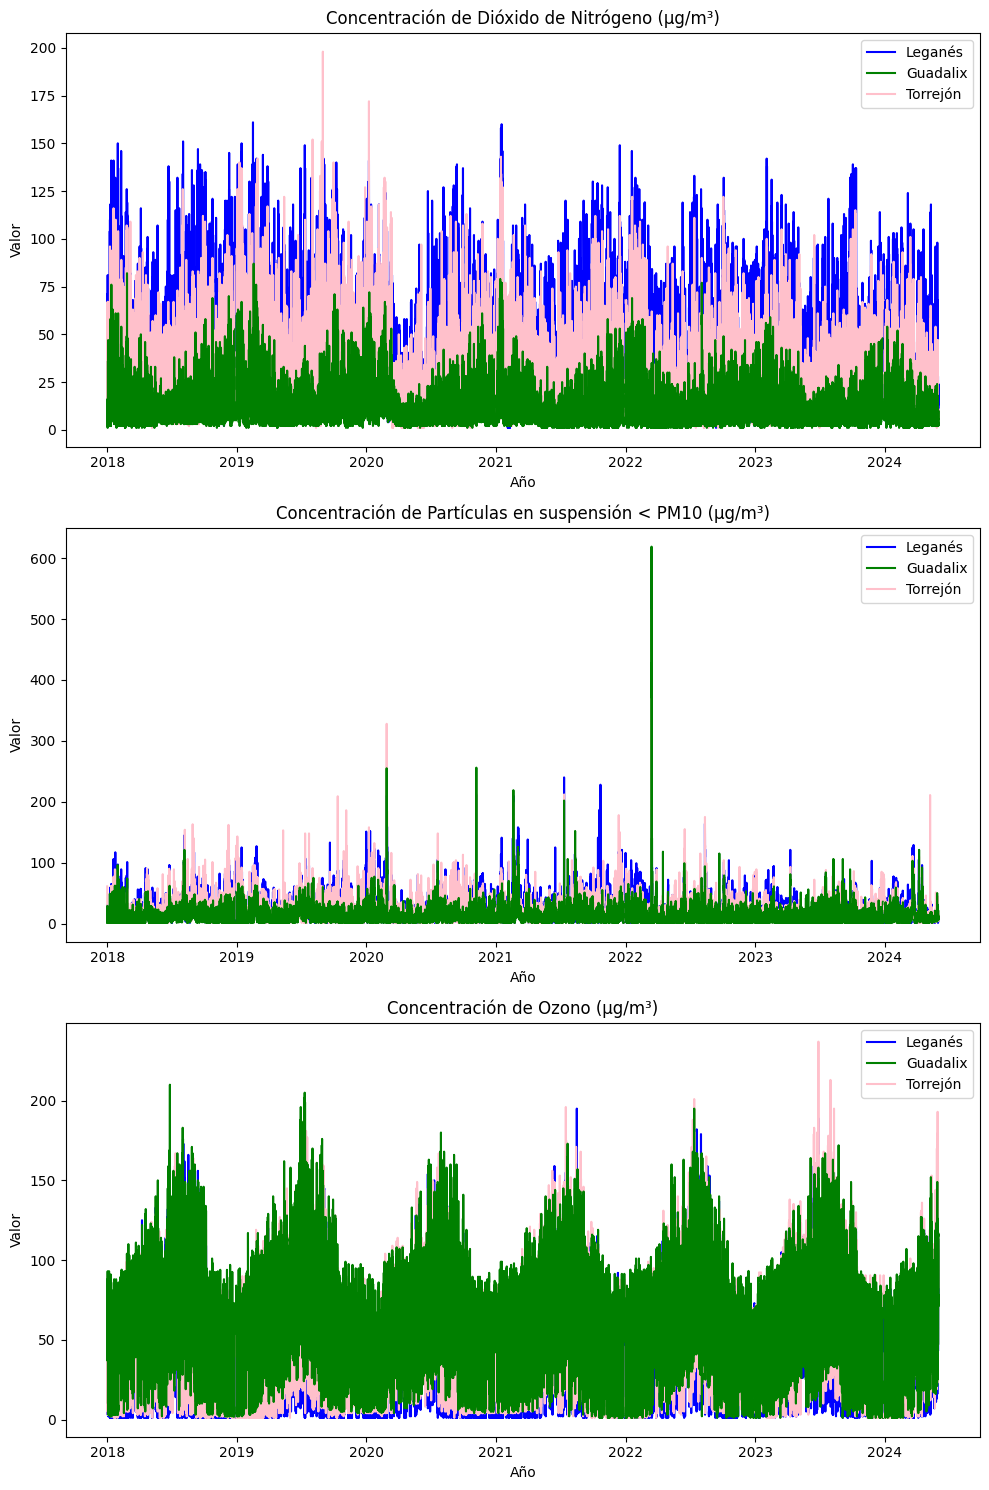

In [9]:
# Visualización de la concentración de los contaminantes en cada localidad 
def visualiza_contaminante():
        
    fig, axs = plt.subplots(3,1, figsize=(10, 15))
    
    for a in años:
        # Graficamos valores de Nitrógeno 
        axs[0].plot(leg_N[a]['fecha'], leg_N[a]['valor'], color='blue', alpha=1)
        
        axs[0].plot(torr_N[a]['fecha'], torr_N[a]['valor'], color='pink', alpha=1)
        axs[0].plot(guad_N[a]['fecha'], guad_N[a]['valor'], color='green', alpha=1)
        axs[0].set_title('Concentración de Dióxido de Nitrógeno (µg/m³)')
        axs[0].set_ylabel('Valor')
        axs[0].set_xlabel('Año')
        
        # Graficamos Partículas en suspensión < PM10
        axs[1].plot(leg_P[a]['fecha'], leg_P[a]['valor'], color='blue', alpha=1)
        
        axs[1].plot(torr_P[a]['fecha'], torr_P[a]['valor'], color='pink', alpha=1)
        axs[1].plot(guad_P[a]['fecha'], guad_P[a]['valor'], color='green', alpha=1)
        axs[1].set_title('Concentración de Partículas en suspensión < PM10 (µg/m³)')
        axs[1].set_ylabel('Valor')
        axs[1].set_xlabel('Año')

        # Graficamos Ozono
        axs[2].plot(leg_O[a]['fecha'], leg_O[a]['valor'], color='blue', alpha=1)
     
        axs[2].plot(torr_O[a]['fecha'], torr_O[a]['valor'], color='pink', alpha=1)
        axs[2].plot(guad_O[a]['fecha'], guad_O[a]['valor'], color='green', alpha=1)
        axs[2].set_title('Concentración de Ozono (µg/m³)')
        axs[2].set_ylabel('Valor')
        axs[2].set_xlabel('Año')
    
    #Añadir leyenda
    axs[0].plot([], [], label='Leganés', color='blue')
    axs[0].plot([], [], label='Guadalix', color='green')
    axs[0].plot([], [], label='Torrejón', color='pink')
    axs[0].legend()

    axs[1].plot([], [], label='Leganés', color='blue')
    axs[1].plot([], [], label='Guadalix', color='green')
    axs[1].plot([], [], label='Torrejón', color='pink')
    axs[1].legend()

    axs[2].plot([], [], label='Leganés', color='blue')
    axs[2].plot([], [], label='Guadalix', color='green')
    axs[2].plot([], [], label='Torrejón', color='pink')
    axs[2].legend()
    
    # Ajustar el espaciado entre subplots
    plt.tight_layout()
    plt.savefig('serie_conc_loc.png', dpi=300, bbox_inches='tight')  # Cambia el nombre de archivo y el formato según sea necesario

    # Mostrar la gráfica
    plt.show()
   
visualiza_contaminante()

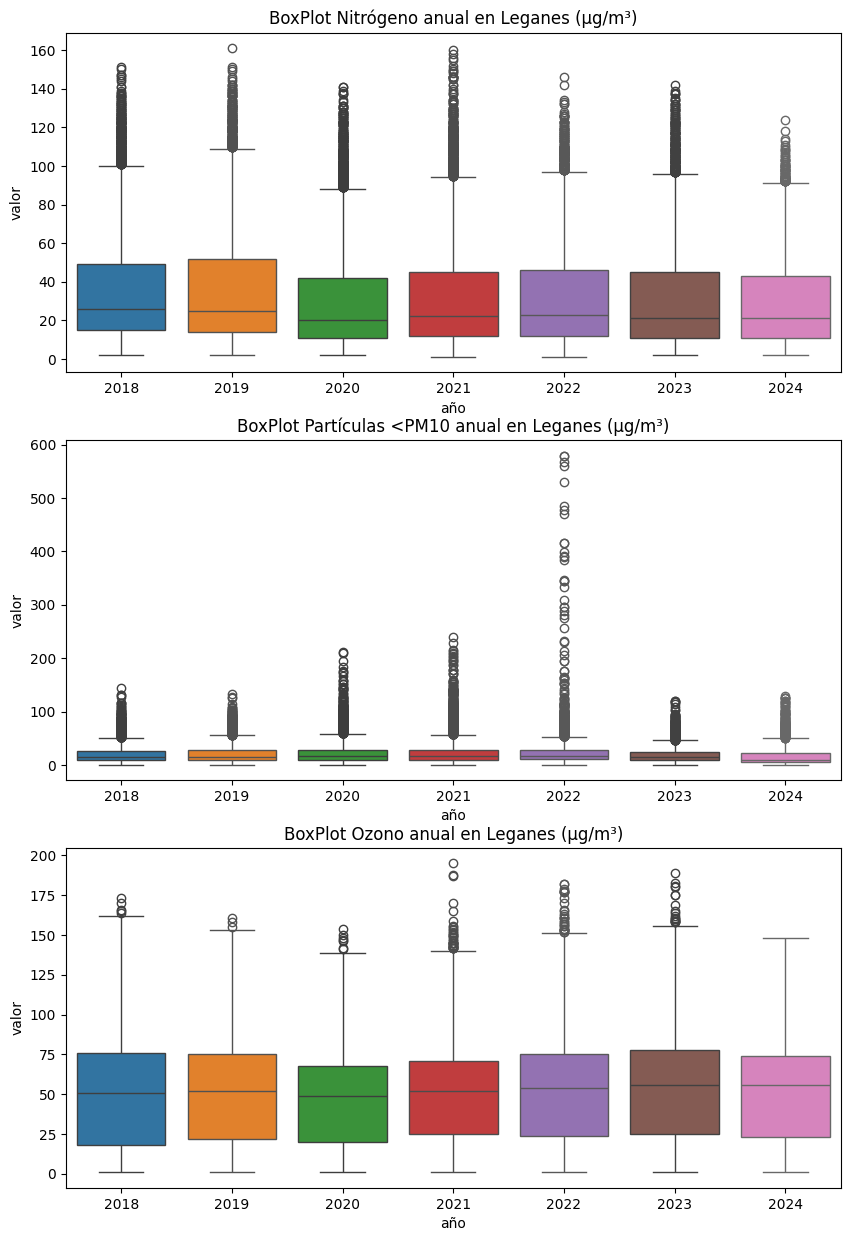

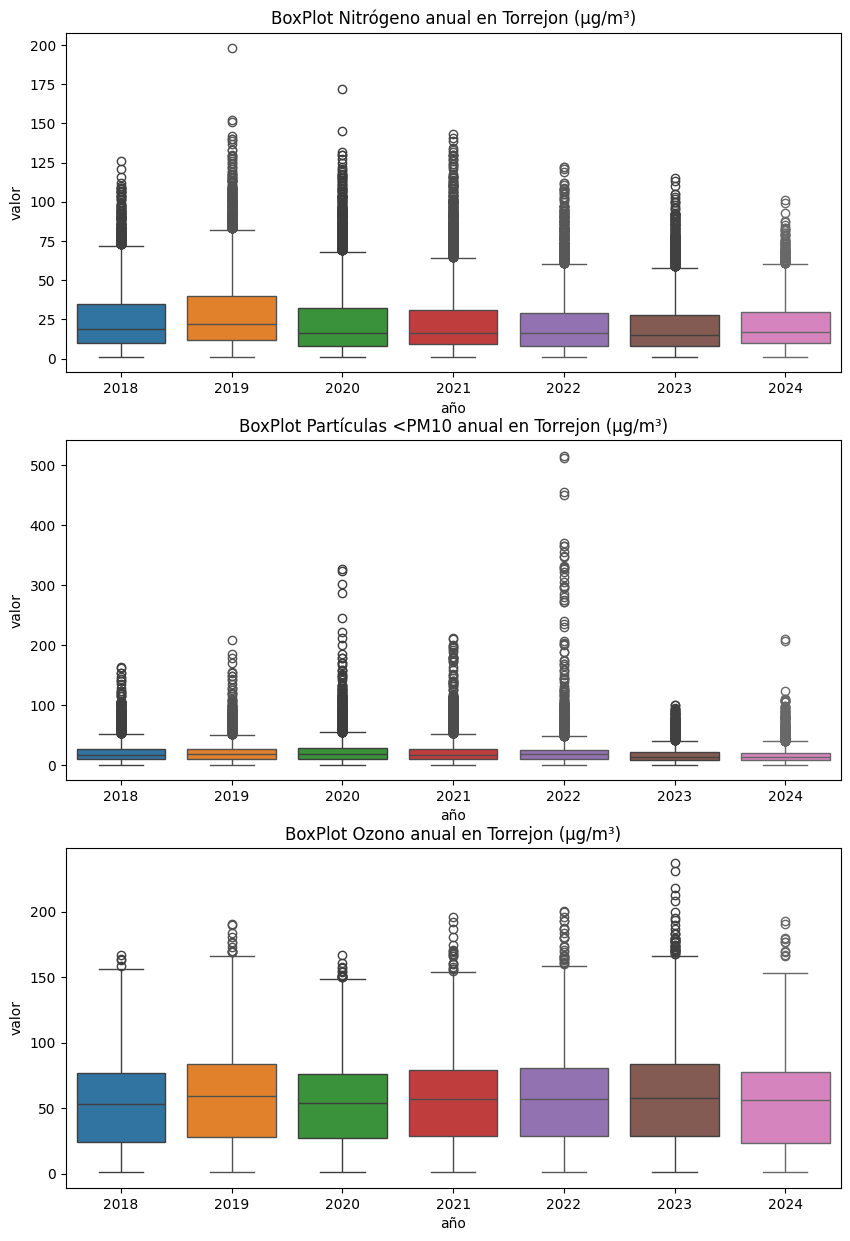

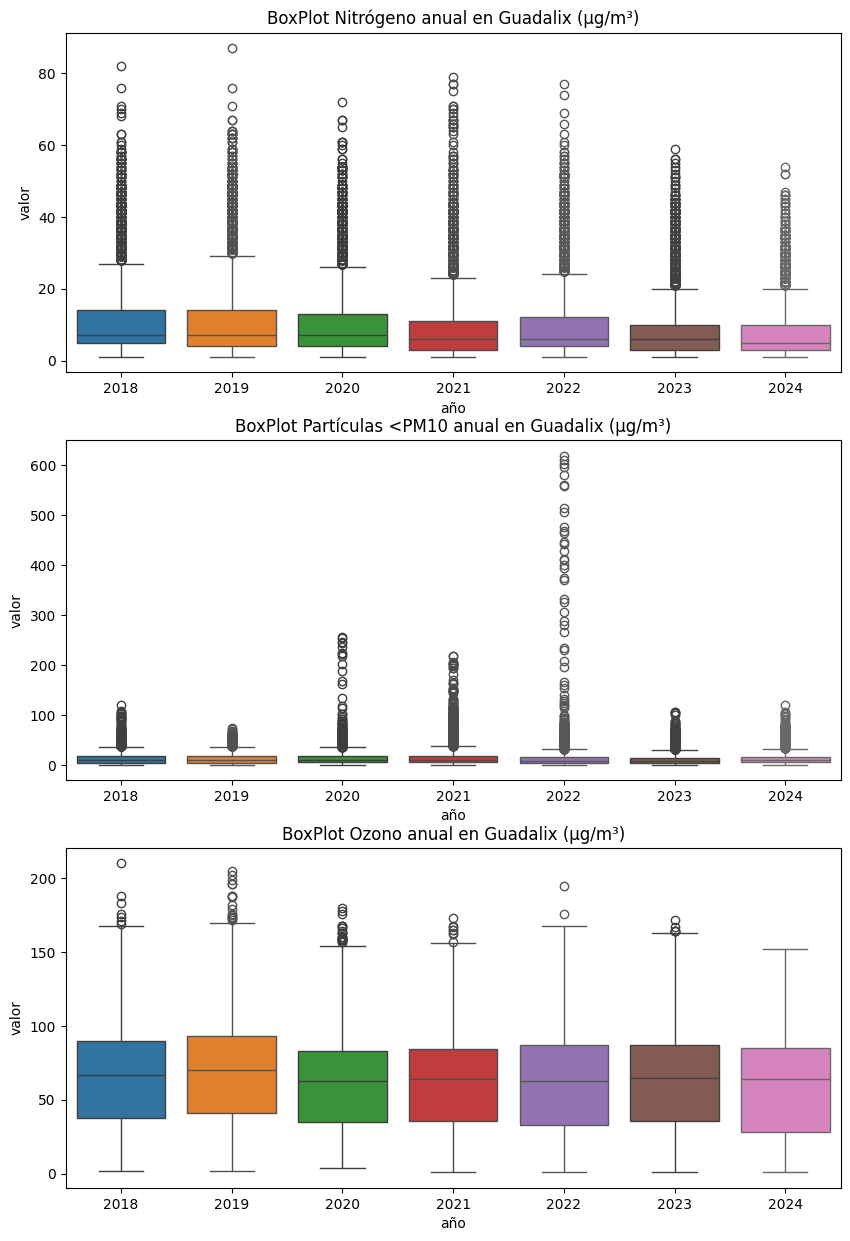

In [11]:
# Diagramas de caja de los contaminantes en cada localidad 
def boxplot(localidad):
    fig, axs = plt.subplots(3,1, figsize=(10, 15))
    for a in años: 
        if localidad == "Leganes":
            df_N = leg_N[a]
            df_P = leg_P[a]
            df_O = leg_O[a]
        elif localidad == "Guadalix":
            df_N = guad_N[a]
            df_P = guad_P[a]
            df_O = guad_O[a]
        elif localidad == "Torrejon":
            df_N = torr_N[a]
            df_P = torr_P[a]
            df_O = torr_O[a]
        sns.boxplot(x='año', y='valor', data=df_N, ax=axs[0])
        sns.boxplot(x='año', y='valor', data=df_P, ax=axs[1])
        sns.boxplot(x='año', y='valor', data=df_O, ax=axs[2])
    
    axs[0].set_title('BoxPlot Nitrógeno anual en ' + f'{localidad} (µg/m³)', fontsize=12)
    axs[1].set_title('BoxPlot Partículas <PM10 anual en ' + f'{localidad} (µg/m³)', fontsize=12)
    axs[2].set_title('BoxPlot Ozono anual en ' + f'{localidad} (µg/m³)', fontsize=12)
    
    plt.savefig(f'boxplot_{localidad}.png')
boxplot("Leganes")
boxplot("Torrejon")
boxplot("Guadalix")


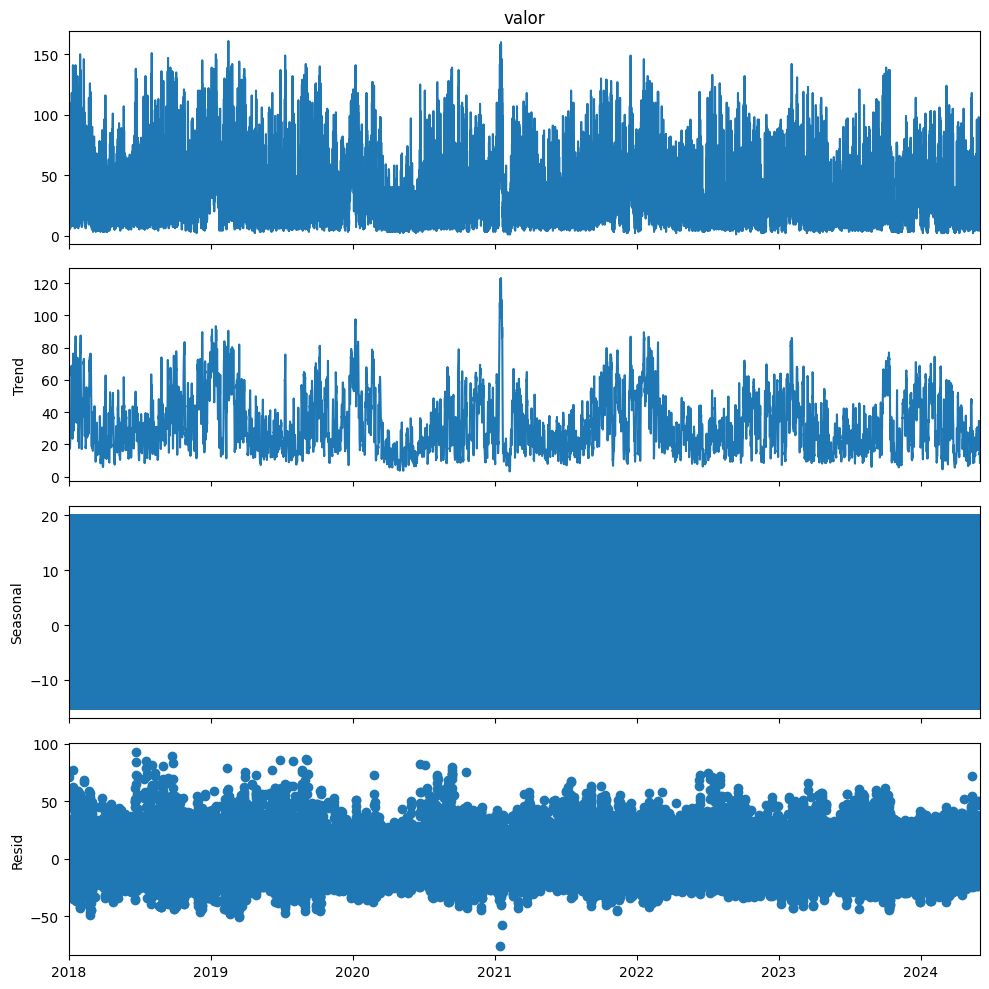

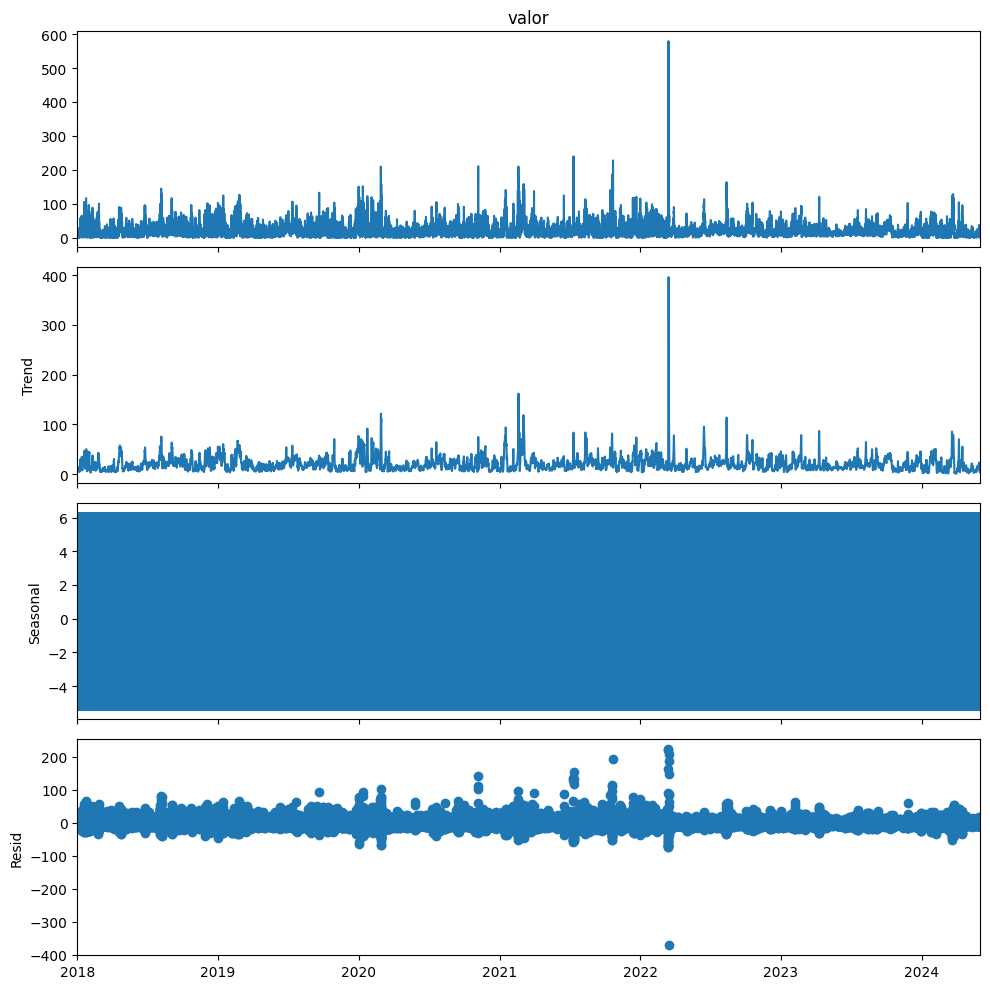

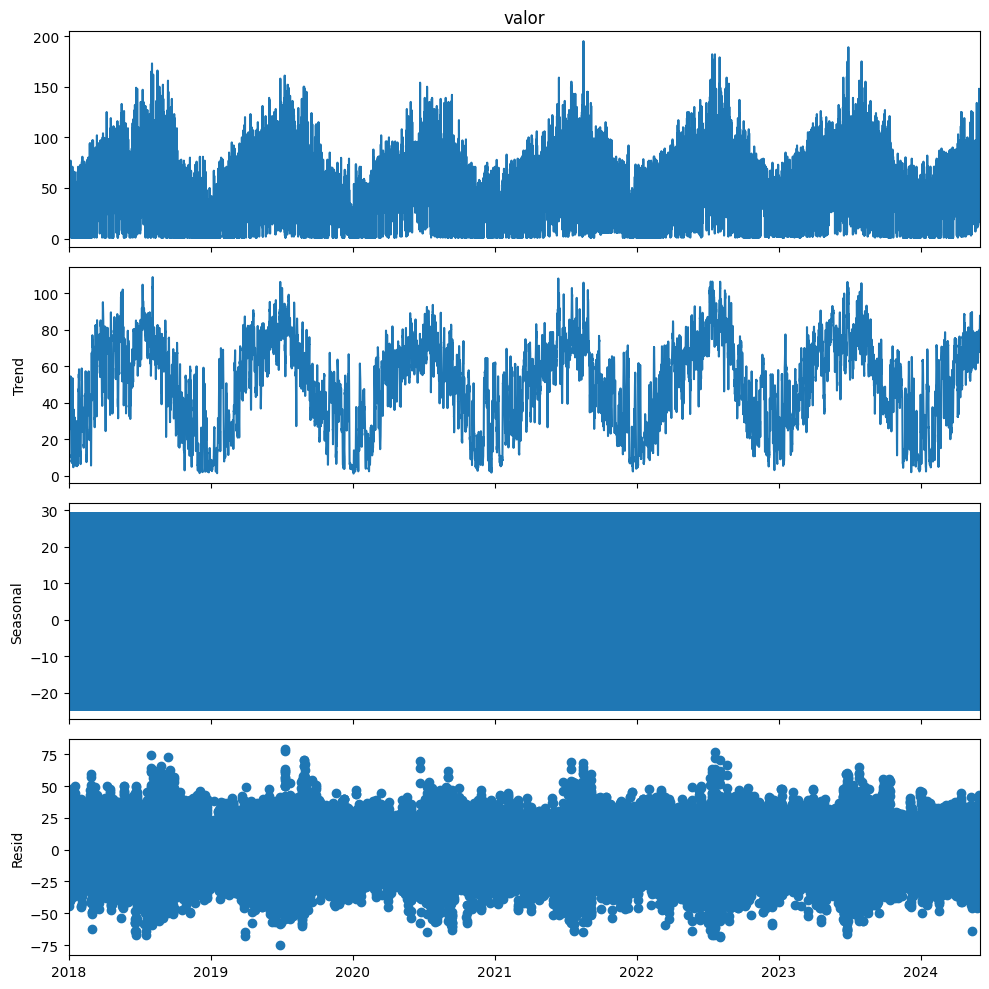

In [12]:
# Descomposición de las componentes de la serie temporal de los contaminantes en cada localidad

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

def plot_descomponer(dict_loc_mag):
    l_df = []
    for a in años:
        l_df.append(dict_loc_mag[a])
    df_t = pd.concat(l_df)
    df_t = df_t.reset_index(drop=True)
    df_t = df_t.set_index('fecha')[['valor']]
    descomp = seasonal_decompose(df_t['valor'], model='additive', extrapolate_trend='freq')
    plt.rcParams.update({'figure.figsize': (10,10)})
    descomp.plot().suptitle('', fontsize=10)
    plt.show()

plot_descomponer(leg_N)
plot_descomponer(leg_P)
plot_descomponer(leg_O)



In [ ]:
# Aplicamos test ADF para ver si las series temporales son estacionarias o no 

from statsmodels.tsa.stattools import adfuller

#ADF_test devuelve True si la serie temporal es estacionaria y False en caso contrario 
def ADF_test(dict_loc_mag):
    l_df = []
    for a in años:
        l_df.append(dict_loc_mag[a])
    df_t = pd.concat(l_df)
    df_t = df_t.reset_index(drop=True)
    df_t = df_t.set_index('fecha')[['valor']]
    print(df_t)
    resultado = adfuller(df_t.valor.values, autolag='AIC')
    return (resultado[1], resultado[1] < 0.05)

l_estacionario = []
for dict_loc_mag in df_loc_mag:
    l_estacionario.append(ADF_test(dict_loc_mag))

l_estacionario 

                     valor
fecha                     
2018-01-01 00:00:00   71.0
2018-01-01 01:00:00   32.0
2018-01-01 02:00:00   29.0
2018-01-01 03:00:00   14.0
2018-01-01 04:00:00   13.0
...                    ...
2024-05-31 19:00:00   21.0
2024-05-31 20:00:00   23.0
2024-05-31 21:00:00   17.0
2024-05-31 22:00:00   12.0
2024-05-31 23:00:00    8.0

[56232 rows x 1 columns]
                     valor
fecha                     
2018-01-01 00:00:00   12.0
2018-01-01 01:00:00   48.0
2018-01-01 02:00:00   50.0
2018-01-01 03:00:00   55.0
2018-01-01 04:00:00   49.0
...                    ...
2024-05-31 19:00:00   87.0
2024-05-31 20:00:00   82.0
2024-05-31 21:00:00   82.0
2024-05-31 22:00:00   81.0
2024-05-31 23:00:00   79.0

[56232 rows x 1 columns]
                     valor
fecha                     
2018-01-01 00:00:00   28.0
2018-01-01 01:00:00   30.0
2018-01-01 02:00:00   21.0
2018-01-01 03:00:00   15.0
2018-01-01 04:00:00   15.0
...                    ...
2024-05-31 19:00:00    7.0
202

[(1.2556112646337675e-29, True),
 (9.376859812294561e-23, True),
 (0.0, True),
 (1.472520250293771e-29, True),
 (3.86441949413965e-21, True),
 (0.0, True),
 (1.0448685922953768e-27, True),
 (1.5619540794658864e-24, True),
 (0.0, True)]

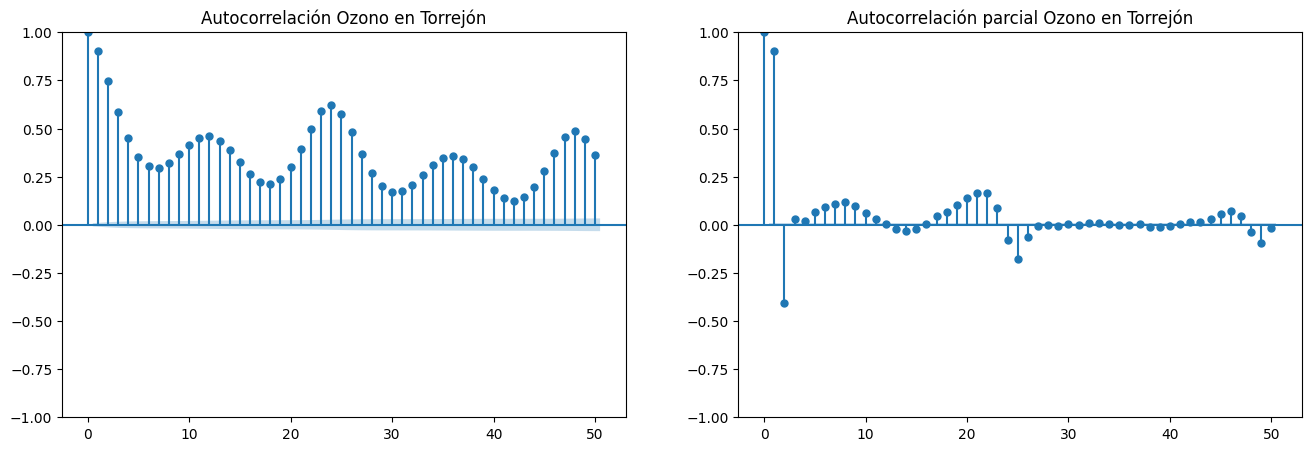

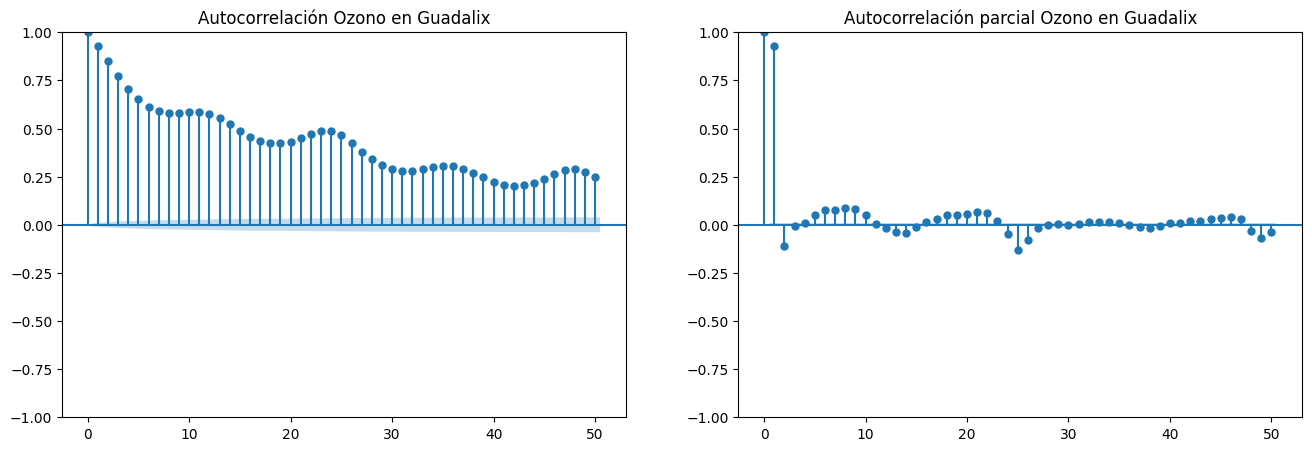

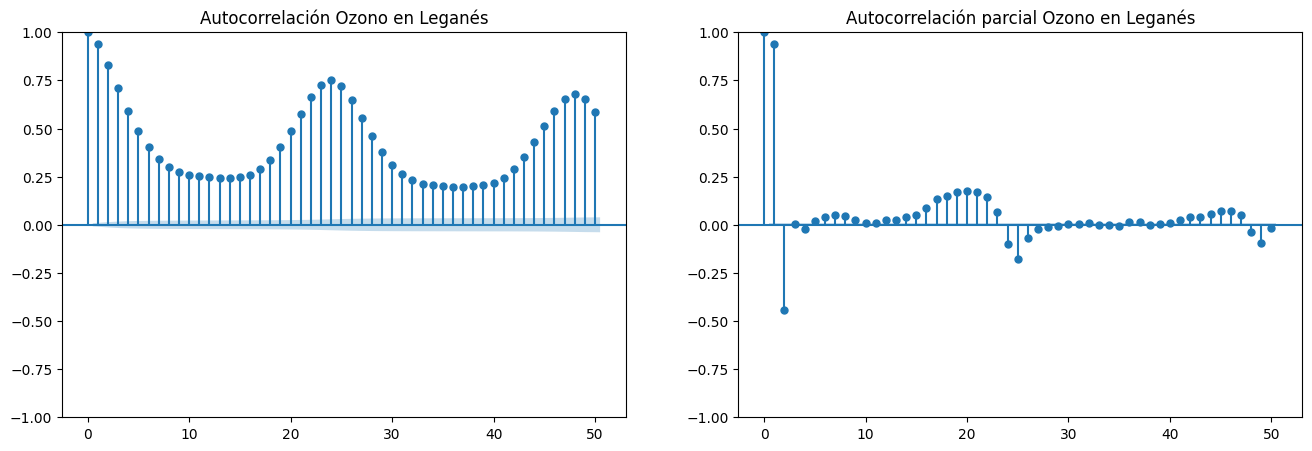

In [13]:
# Sacamos las gráficas de autocorrelación de las series temporales de los contaminantes en cada localidad
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_corr(dict_loc_mag, localidad):
    l_df = []
    for a in años:
        l_df.append(dict_loc_mag[a])
    df_t = pd.concat(l_df)
    df_t = df_t.reset_index(drop=True)
    df_t = df_t.set_index('fecha')[['valor']]
    fig, axes = plt.subplots(1,2,figsize=(16,5), dpi= 100)
    plot_acf(df_t.valor.tolist(), lags=50, ax=axes[0], title=f"Autocorrelación Ozono en {localidad}" )
    plot_pacf(df_t.valor.tolist(), lags=50, ax=axes[1], title=f"Autocorrelación parcial Ozono en {localidad}") 



plot_corr(leg_N, "Torrejón")
plot_corr(leg_P, "Guadalix")
plot_corr(leg_O, "Leganés")